<a href="https://colab.research.google.com/github/ghanalk1/Airbnb-Hotel-Booking-EDA/blob/main/Airbnb_Hotel_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Problem Statement**

---


# **Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.**
# **This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.**
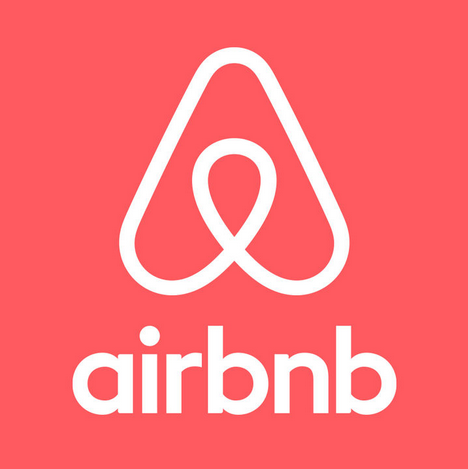

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Importing Dataset**

In [ ]:
url = '/content/drive/MyDrive/dat/Airbnb NYC 2019.csv'

In [ ]:
df = pd.read_csv(url)
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [ ]:
df.tail(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


# **2. Preprocessing the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### **removing less important columns**

In [ ]:
# removing less important columns
hotel = df.drop(['name', 'host_name', 'last_review'], axis=1)

In [ ]:
# checking new dataframe
hotel.head(3)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


### **checking and handling null values**

In [ ]:
# checking null values
hotel.isna().sum()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# checking reviews_per_month column to get idea of it's values
hotel['reviews_per_month']

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

In [ ]:
# replacing null values with 0
hotel.fillna(value={'reviews_per_month': 0}, inplace=True)

In [ ]:
# null values handled
hotel.isna().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# **3. Exploratory Data Analysis**

### **What is the number of hotels in different neighbourhood_group?**

In [ ]:
hotel['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64



> #### Therefore Manhattan and Brooklyn have the highest number of hotels while Staten Island having the least.



### **What are the top 10 most popular neighbourhoods?**

In [ ]:
hotel['neighbourhood'].value_counts()[:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64



> #### Williamsburg, Bedford-Stuyvesant are the neighbours with highest number of hotels



### **number of different types of hotels**

In [ ]:
hotel['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

([<matplotlib.patches.Wedge at 0x7f43d52e4650>,
 [Text(-0.14199930606731279, 2.295612379535448, 'Entire home/apt'),
  Text(-0.029333460164344863, -2.299812937635317, 'Private room'),
  Text(2.3434758426783215, -0.17498849900244787, 'Shared room')],
 [Text(-0.0802604773423942, 1.2975200406069922, '52%'),
  Text(-0.016579781832021006, -1.2998942690982225, '46%'),
  Text(1.3462520798364825, -0.10052530793757641, '2%')])

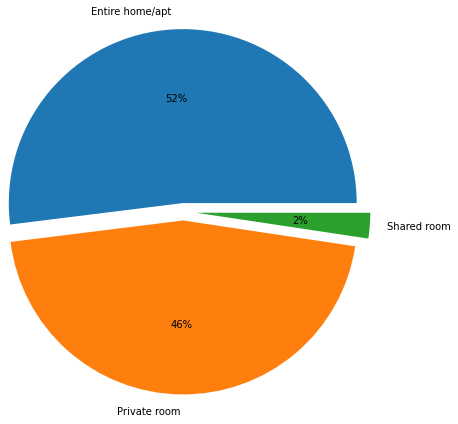

In [ ]:
# piechart to show percentage
x = hotel.groupby('room_type')['id'].count().reset_index().rename(columns={'id': 'Count'})
plt.pie(x['Count'], labels=x['room_type'], radius=2, explode=[0.1,0.1,0.15], autopct='%1.0f%%')


*   
> #### 'Entire home/apt' type of hotels are most popular followed closely by 'private rooms'.
*   
> #### 'Shared room' are the least popular.
*
> #### This implies that people are more interested in living seperately.







### **different types of hotels in each neighbourhood_groups**

Text(0.5, 1.0, 'Hotel types in different areas')

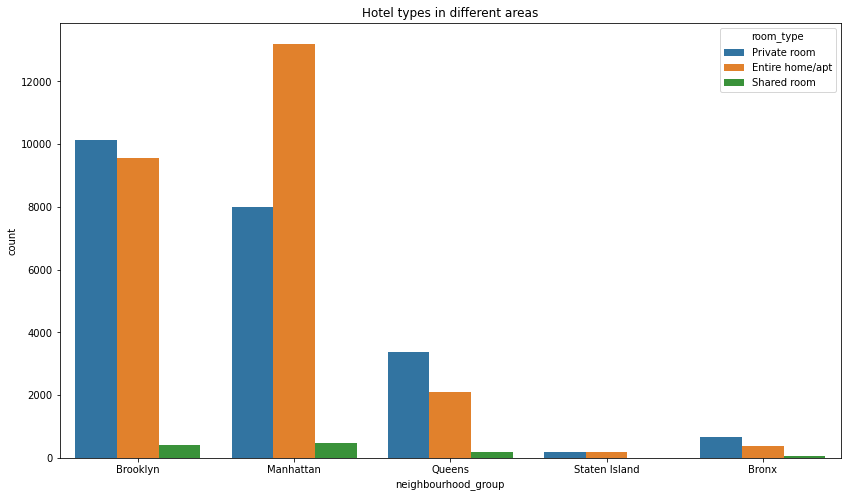

In [ ]:
plt.figure(figsize=[14,8])
sns.countplot(data=hotel, x='neighbourhood_group', hue='room_type')
plt.title('Hotel types in different areas')



*   > #### The 'shared room' hotel type is least popular among all the neighbourhood_groups
*   > #### 'Private room' is the most popular among Brooklyn, Queens, Bronx (highest in Brooklyn).
*  > #### In Manhattan, 'Entire home/apt' is most popular. One explaination can be that the Manhattan is the financial centre of the city, hence mostly visited by rich and wealthy personalities which prefer entire apartment over private rooms.




### **What is the median prices of different room types?**



Text(0.5, 1.0, 'Median Price for each room_type')

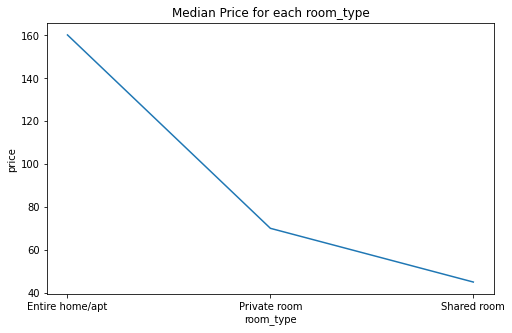

In [ ]:
median_price = hotel.groupby('room_type')['price'].median().reset_index()
plt.figure(figsize=[8,5])
sns.lineplot(data=median_price, x='room_type', y='price')
plt.title('Median Price for each room_type')


* > #### As expected, 'Entire home/apt' is the most expensive option while 'Shared room' being the cheapest.
* > #### We can now understand why 'Private room' is the most popular hotel type. It offers privacy just like 'Entire home/apt' while not being very expensive, hence more people can afford these.



Text(0.5, 1.0, 'Each neighbourhood_group median price for room_types')

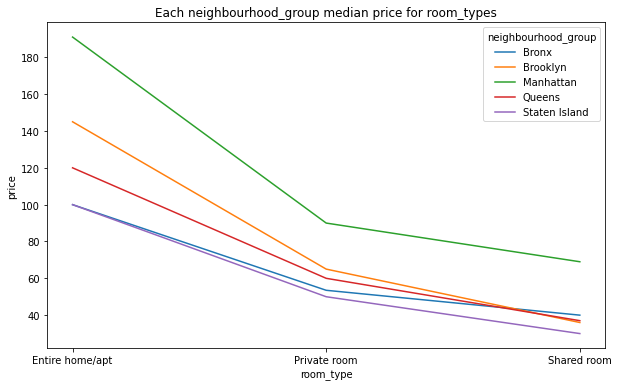

In [ ]:
# median price in different neghbourhood groups
variation_price = hotel.groupby(['neighbourhood_group', 'room_type'])['price'].median().reset_index()
plt.figure(figsize=[10,6])
sns.lineplot(data=variation_price, x='room_type', y='price', hue='neighbourhood_group')
plt.title('Each neighbourhood_group median price for room_types')


* > #### Manhattan is the most expensive option for any room type, again due to being financial center and the most popular tourist spot. It is followed be Brooklyn being the second most expensive.
* > #### Staten Island and Bronx have the cheapest rooms of any type (Staten Island being overall the most cheap), which might be due to their location, locality. Queens is the middle point.



### **number_of_reviews each neighbourhood_group has**


In [ ]:
# calculating average reviews a neighbourhood_group has
reviews = hotel.groupby('neighbourhood_group')['number_of_reviews'].mean().reset_index()
reviews

,neighbourhood_group,number_of_reviews
0,Bronx,26.004583
1,Brooklyn,24.202845
2,Manhattan,20.985596
3,Queens,27.700318
4,Staten Island,30.941019


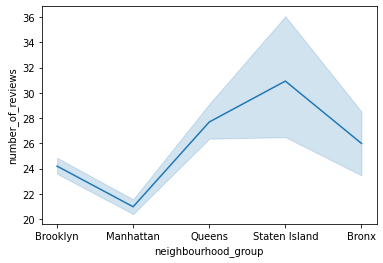

In [ ]:
sns.lineplot(data=hotel, x='neighbourhood_group', y='number_of_reviews')

> #### Staten Island has the highest average number of reviews a hotel gets while Manhattan having the lowest average.

In [ ]:
# calculating count of reviews a neighbourhood_group has
reviews_count = hotel.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index()
reviews_count

,neighbourhood_group,number_of_reviews
0,Bronx,28371
1,Brooklyn,486574
2,Manhattan,454569
3,Queens,156950
4,Staten Island,11541


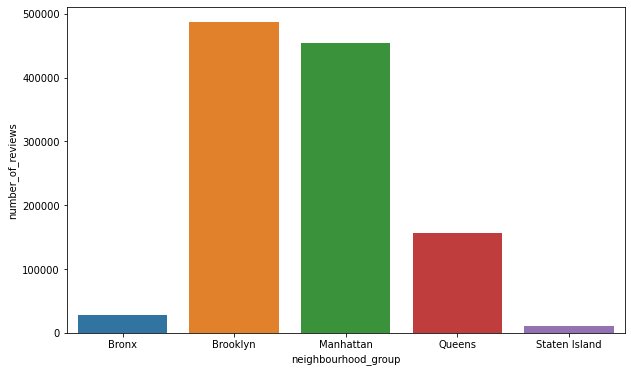

In [ ]:
plt.figure(figsize=[10,6])
sns.barplot(data=reviews_count, x='neighbourhood_group', y='number_of_reviews')




* > #### In terms of reviews a neighbourhood_group gets in total, Brooklyn has the highest count followed by Manhattan.
* > #### Here, Staten Island has the lowest count, explaining why it had such a high average review per hotel.
* > #### More reviews a hotel gets, more trustworthy it is assumed to be and more likely it is to be visited by other people. 
* > #### Here Brooklyn and Manhattan have the highest number of reviews. This can help us in understanding the price difference between these neighbourhood_groups.
* > #### The chart above shows reviews in order : Manhattan > Brooklyn > Queens > Bronx > Staten Island, which is exactly the order of prices of hotels.





### **number_of _reviews a room_type gets in a neighbourhood_group**

In [ ]:
reviews_room_type = hotel.groupby(['neighbourhood_group', 'room_type'])['number_of_reviews'].sum().reset_index()
reviews_room_type

,neighbourhood_group,room_type,number_of_reviews
0,Bronx,Entire home/apt,11627
1,Bronx,Private room,16312
2,Bronx,Shared room,432
3,Brooklyn,Entire home/apt,267128
4,Brooklyn,Private room,213653
5,Brooklyn,Shared room,5793
6,Manhattan,Entire home/apt,235147
7,Manhattan,Private room,209150
8,Manhattan,Shared room,10272
9,Queens,Entire home/apt,60644


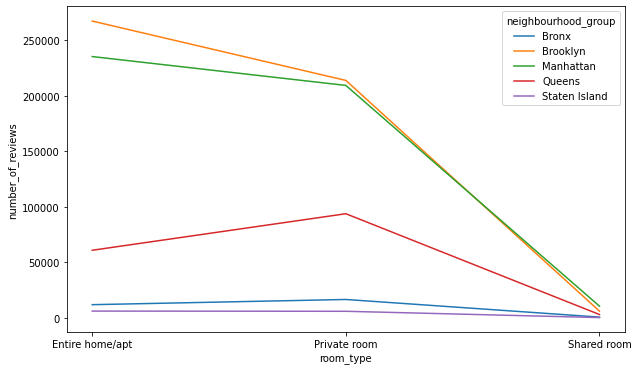

In [ ]:
plt.figure(figsize=[10,6])
sns.lineplot(data=reviews_room_type, x='room_type', y='number_of_reviews', hue='neighbourhood_group')


* > #### In every neighbourhood_group, 'Shared room' are the lowest reviewed hotels. Brooklyn is the highest reviewed region for 'Entire home/apt' and 'Private room' followed closely by Manhattan.
* > #### Queens on the other hand comes in between the highest and lowest voted. Staten Island is the lowest reviewed overall, followed closely by Bronx.
* > #### This again explains the price difference between different neighbourhood_groups.



### **Availability (0-365) of hotels**

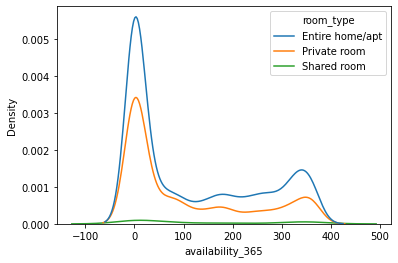

In [ ]:
# availability of each type of hotel in every neigbourhood_group

# for Manhattan
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Manhattan'], x='availability_365', hue='room_type')

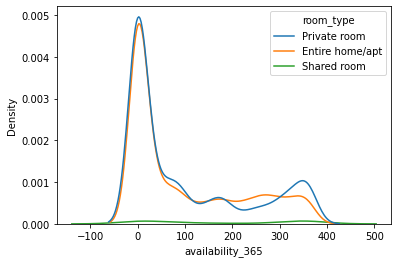

In [ ]:
# for Brooklyn
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Brooklyn'], x='availability_365', hue='room_type')

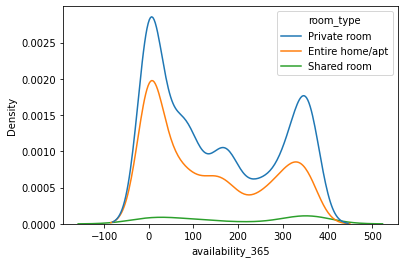

In [ ]:
# for Queens
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Queens'], x='availability_365', hue='room_type')

* > #### For Manhattan and Brooklyn, it shows that most of the 'Entire home/apt' and 'Private room' are booked year around. This can be due to the advanced booking done by tourists. Hence there are small portions of hotels available year around, this factor also aids increased prices of hotels in these regions.
* > #### Queens has a much larger portion of hotels available year around, explaining its cheap price compared to Brooklyn and Manhattan.

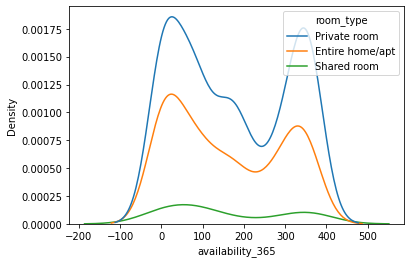

In [ ]:
# for Bronx
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Bronx'], x='availability_365', hue='room_type')

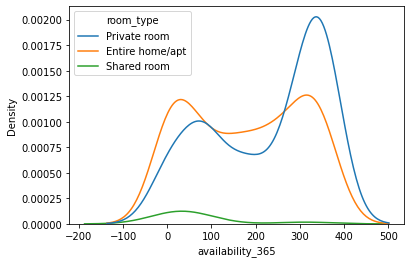

In [ ]:
# for Staten Island
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Staten Island'], x='availability_365', hue='room_type')

* > #### Bronx and Staten Island are not a big tourist attraction and hence a large portion of hotels are available year around.
* > #### This also explains why hotels are cheaper here.

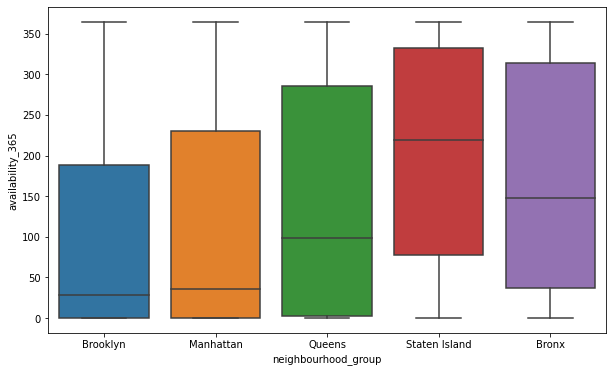

In [ ]:
# final overall comparison
plt.figure(figsize=[10,6])
sns.boxplot(data=hotel, x='neighbourhood_group', y='availability_365')

### **What is the minumum number of nights a person stays?**

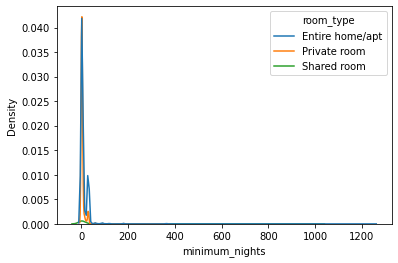

In [ ]:
# minimum nights a person stays in different types of hotels in every neigbourhood_group

# for Manhattan
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Manhattan'], x='minimum_nights', hue='room_type')

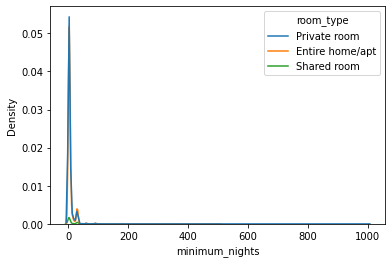

In [ ]:
# for Brooklyn
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Brooklyn'], x='minimum_nights', hue='room_type')

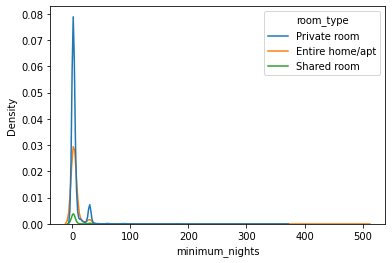

In [ ]:
# for Queens
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Queens'], x='minimum_nights', hue='room_type')

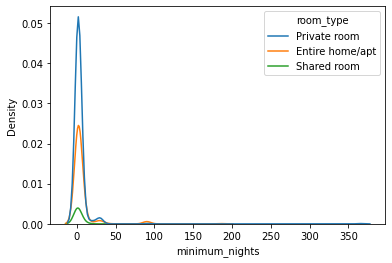

In [ ]:
# for Bronx
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Bronx'], x='minimum_nights', hue='room_type')

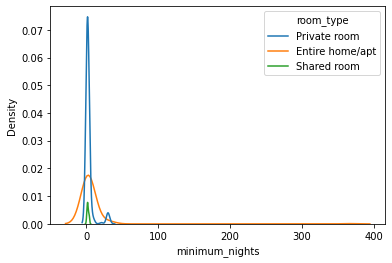

In [ ]:
# for Staten Island
sns.kdeplot(data=hotel[hotel['neighbourhood_group'] == 'Staten Island'], x='minimum_nights', hue='room_type')

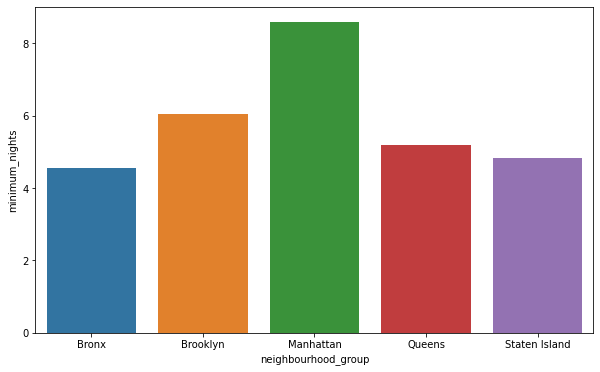

In [ ]:
# overall comparison
min_nights = hotel.groupby('neighbourhood_group')['minimum_nights'].mean().reset_index()
plt.figure(figsize=[10, 6])
sns.barplot(data=min_nights, x='neighbourhood_group', y='minimum_nights')

### **plotting hotels using their longitude and latitude**

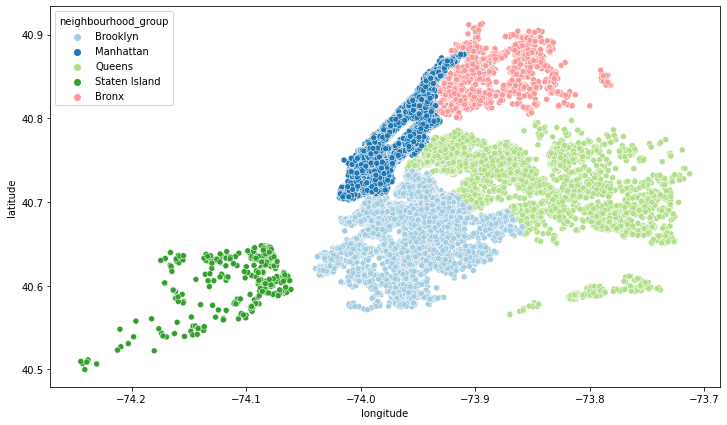

In [ ]:
# whole new york city
plt.figure(figsize=[12, 7])
sns.scatterplot(data=hotel, y='latitude', x='longitude', hue='neighbourhood_group', palette='Paired')

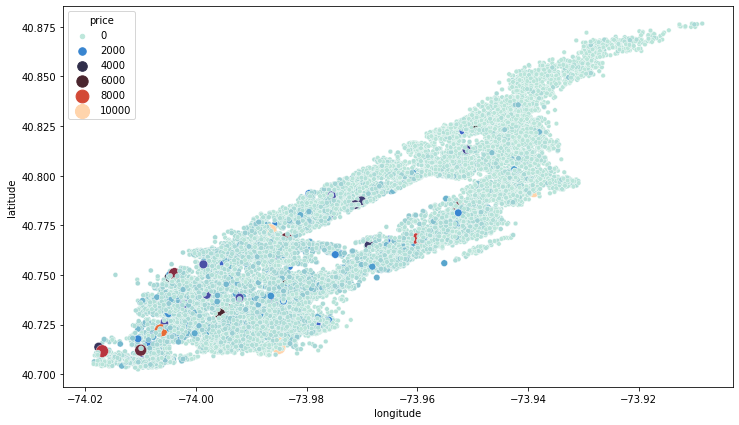

In [ ]:
# plotting Manhattan
plt.figure(figsize=[12, 7])
sns.scatterplot(data=hotel[hotel['neighbourhood_group'] == 'Manhattan'], y='latitude', x='longitude', hue='price', size='price', sizes=(20, 200), palette='icefire')

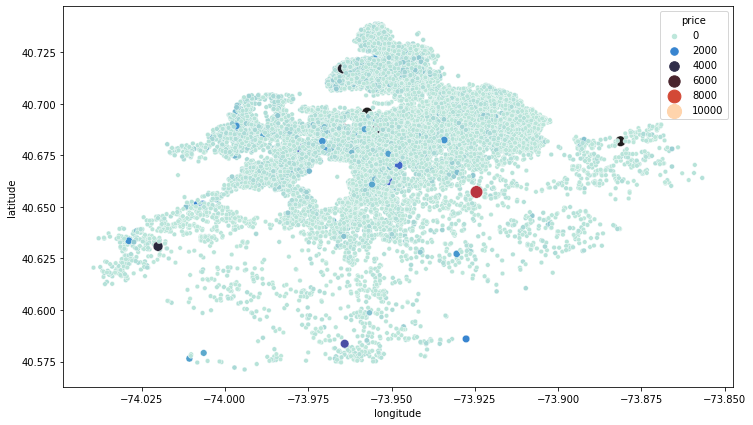

In [ ]:
# plotting Brooklyn
plt.figure(figsize=[12, 7])
sns.scatterplot(data=hotel[hotel['neighbourhood_group'] == 'Brooklyn'], y='latitude', x='longitude', hue='price', size='price', sizes=(20, 200), palette='icefire')

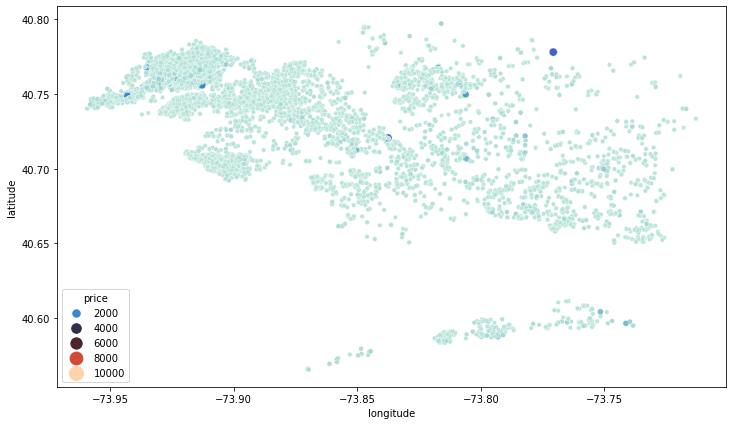

In [ ]:
# plotting Queens
plt.figure(figsize=[12, 7])
sns.scatterplot(data=hotel[hotel['neighbourhood_group'] == 'Queens'], y='latitude', x='longitude', hue='price', size='price', sizes=(20, 200), palette='icefire')

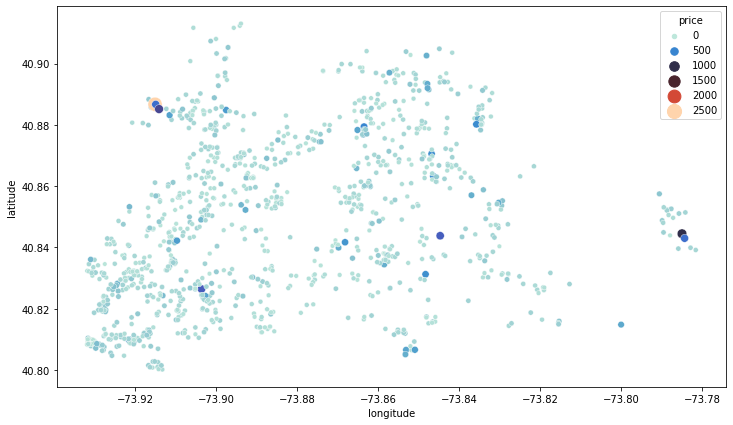

In [ ]:
# plotting bronx
plt.figure(figsize=[12, 7])
sns.scatterplot(data=hotel[hotel['neighbourhood_group'] == 'Bronx'], y='latitude', x='longitude', hue='price', size='price', sizes=(20, 200), palette='icefire')

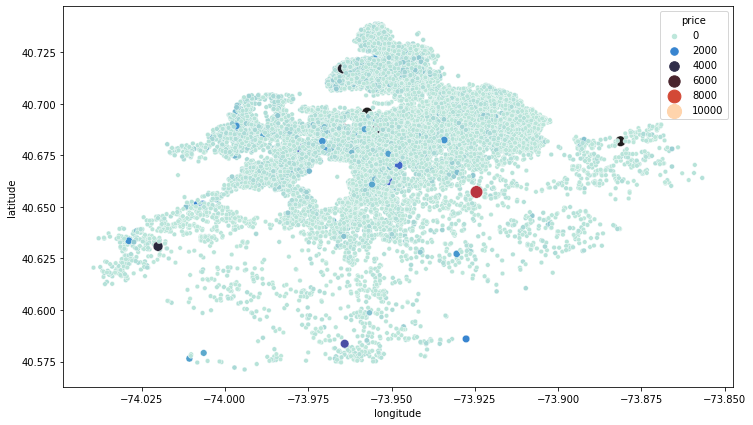

In [ ]:
# plotting Staten Island
plt.figure(figsize=[12, 7])
sns.scatterplot(data=hotel[hotel['neighbourhood_group'] == 'Brooklyn'], y='latitude', x='longitude', hue='price', size='price', sizes=(20, 200), palette='icefire')

### **Hosts with most no. of listings**

In [ ]:
hosts = hotel.groupby(['host_id','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index().sort_values(by='calculated_host_listings_count', ascending=False)
hosts[:10]

,host_id,neighbourhood_group,calculated_host_listings_count
34757,219517861,Manhattan,106929
29495,107434423,Manhattan,53360
19636,30283594,Manhattan,14641
12846,12243051,Manhattan,9216
14482,16098958,Manhattan,9216
25743,61391963,Manhattan,8281
31174,137358866,Queens,8137
17149,22541573,Manhattan,7482
33975,200380610,Manhattan,4225
3055,1475015,Manhattan,2704




* > #### Host with id '219517861' leads the most expensive neighbourhood group in NYC with around 106929 properties listed.
* > #### Most of the listings are from Manhattan.



### **Busiest/most Popular hosts**

In [ ]:
busiest_hosts = hotel.groupby(['host_id', 'room_type'])['number_of_reviews'].max().reset_index().sort_values(by='number_of_reviews', ascending=False)
busiest_hosts[:10]

,host_id,room_type,number_of_reviews
24497,47621202,Private room,629
7710,4734398,Private room,607
22225,37312959,Private room,543
4593,2369681,Private room,540
19453,26432133,Private room,510
13714,12949460,Entire home/apt,488
1976,792159,Private room,480
5059,2680820,Private room,474
161,42273,Entire home/apt,467
18297,23591164,Private room,466




* > #### Host '47621202' is the busiest
* > #### Most of the room Types are private room and entire home.



# **4. Conclusion**

*  ### Order of number of hotels: Manhattan > Brooklyn > Queens > Bronx > Staten Island.

*  ### We found that private rooms and entire apt/home are the most popular room types in New York City.

*  ### Entire apt/home is most popular in Manhattan, while in every other region: private room > entire apt/home > shared room.

*  ### As expected, entire home/apt are the most expensive room type followed by private room and shared room.

*  ### In terms of costliest neighbouhood groups: Manhattan > Brooklyn > Queens > Bronx > Staten Island.

* ### Number of reviews recieved: Brooklyn > Manhattan > Queens > Bronx > Staten Island.

* ### Brooklyn and Manhattan have the lowest overall availability, most of the hotels are either booked throughout the year or available for less than 50 days in a year. While on Hotels in Staten Island and Bronx are readily available throughout the year.

* ### A person spends most in nights in this order: Manhattan > Brooklyn > Queens > Staten Island > Bronx

* ### Most of the hosts listings are from Manhattan

* ### Private room and entire apt/home hosts are the most busy.